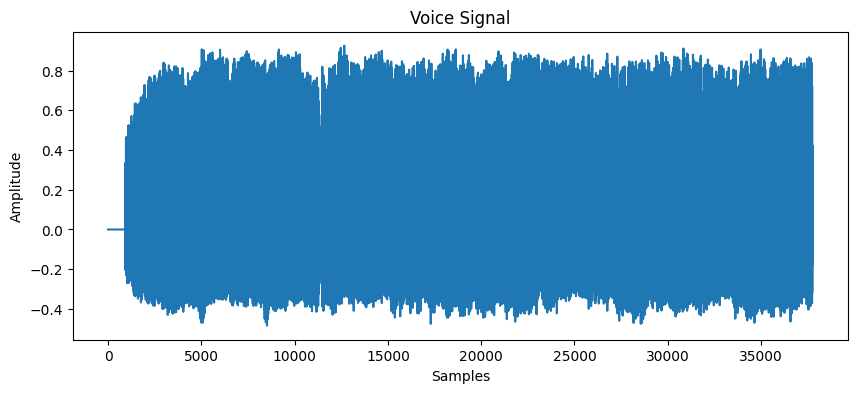

In [16]:
import wfdb
import matplotlib.pyplot as plt

# Load the data from .hea file
record = wfdb.rdrecord('../data/voices/voice098')

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal)
plt.title('Voice Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

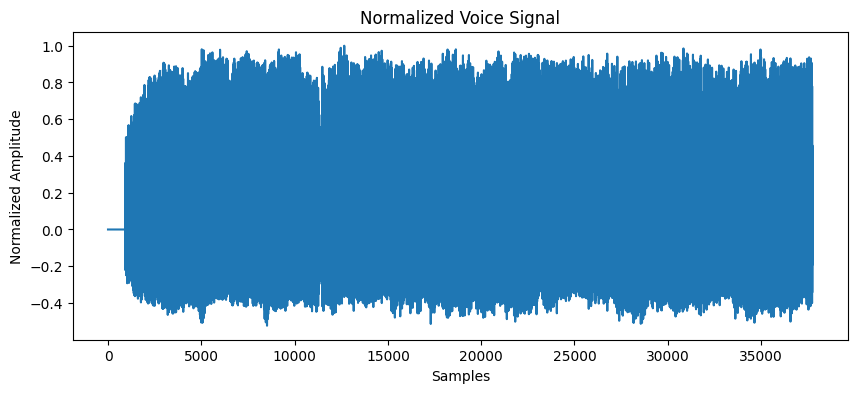

In [17]:
import numpy as np

# Normalize the signal
normalized_signal = record.p_signal / np.max(np.abs(record.p_signal))

# Plot normalized signal
plt.figure(figsize=(10, 4))
plt.plot(normalized_signal)
plt.title('Normalized Voice Signal')
plt.xlabel('Samples')
plt.ylabel('Normalized Amplitude')
plt.show()


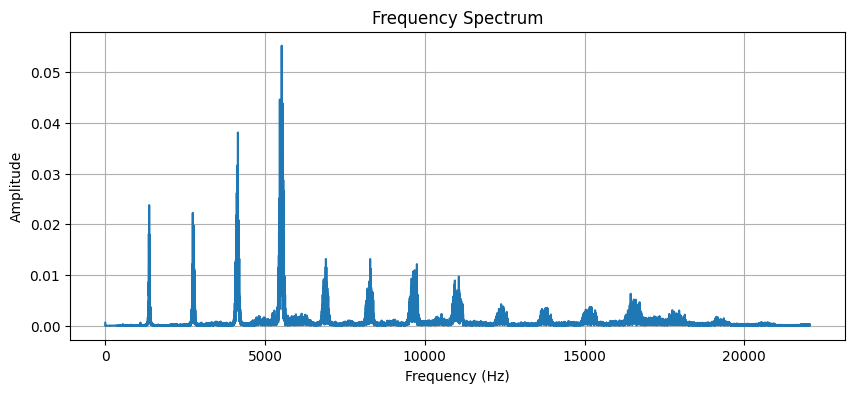

In [18]:
from scipy.fft import fft, fftfreq

# Compute the FFT
N = len(record.p_signal)
T = 1 / 44100  # Assuming sampling frequency of 44.1 kHz
yf = fft(record.p_signal.flatten())
xf = fftfreq(N, T)[:N//2]

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


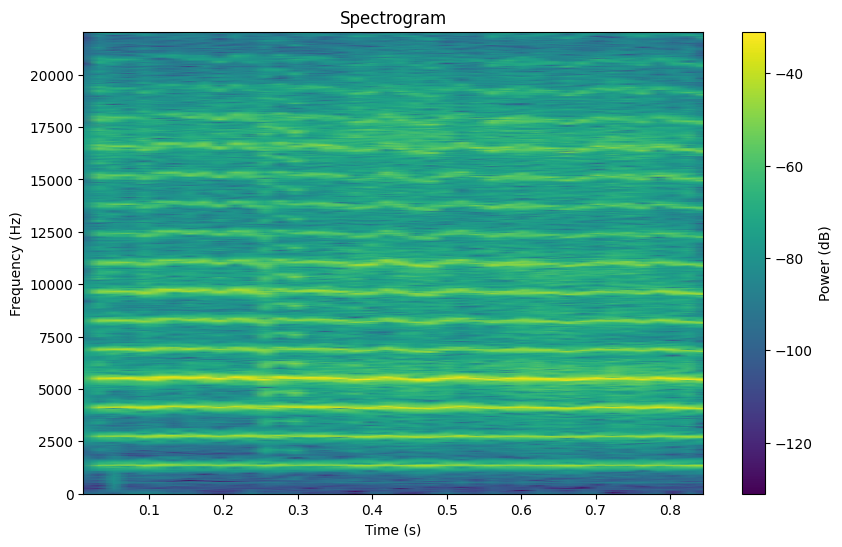

In [19]:
from scipy.signal import spectrogram

# Compute and plot the spectrogram
f, t, Sxx = spectrogram(record.p_signal.flatten(), fs=44100, nperseg=1024)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power (dB)')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


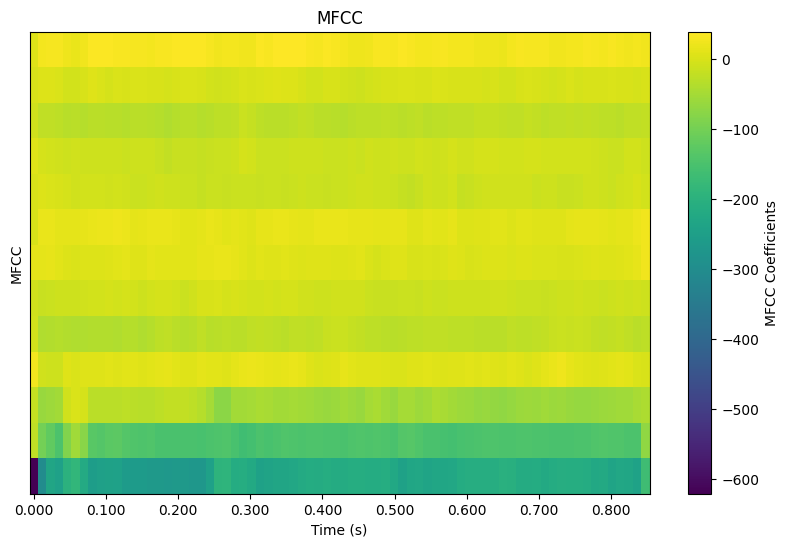

In [20]:
import librosa
import librosa.display

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=record.p_signal.flatten(), sr=44100, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, sr=44100, x_axis='time', cmap='viridis')
plt.colorbar(label='MFCC Coefficients')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC')
plt.show()


In [21]:
# Extract features
mean_amplitude = np.mean(record.p_signal)
max_amplitude = np.max(record.p_signal)
rms_amplitude = np.sqrt(np.mean(record.p_signal ** 2))

# Combine features into a vector
features = [mean_amplitude, max_amplitude, rms_amplitude] + list(np.mean(mfccs, axis=1))

print("Feature Vector:", features)


Feature Vector: [np.float64(-0.0002890578765102075), np.float64(0.9250488281453981), np.float64(0.24533403472258314), np.float64(-234.00732622873937), np.float64(-140.5354820465298), np.float64(-49.262722653134844), np.float64(7.4060093935880404), np.float64(-27.60020131824768), np.float64(-10.208854240911075), np.float64(5.770715947475685), np.float64(11.938297049166815), np.float64(-11.608437736613933), np.float64(-10.647860845042311), np.float64(-27.27229357911271), np.float64(-1.946016510042569), np.float64(28.247789248665768)]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Simulated feature matrix (n_samples, n_features) and labels
X = np.random.rand(208, len(features))  # Replace with extracted features
y = np.random.randint(0, 2, 208)  # Replace with actual labels (0 = dobré, 1 = patologické)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.53      0.45      0.49        20
           1       0.56      0.64      0.60        22

    accuracy                           0.55        42
   macro avg       0.54      0.54      0.54        42
weighted avg       0.55      0.55      0.54        42



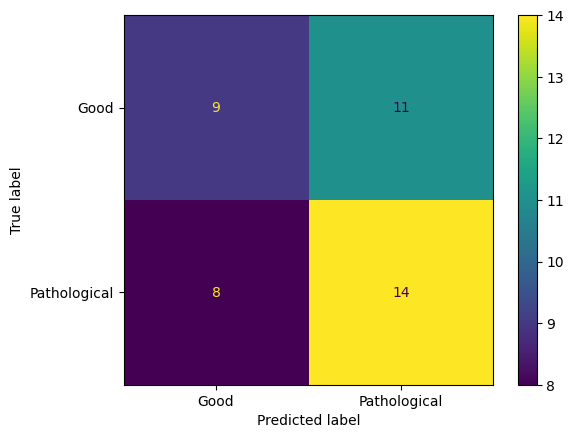

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Pathological'])
disp.plot()
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Simulovaný seznam záznamů (nahradit skutečnými daty)
num_records = 208  # Počet hlasových záznamů
features_list = []
labels = []  # Předpokládáme, že máme anotace (0 = zdravý, 1 = patologický)

for i in range(num_records):
    # Načíst signál (nahradit skutečnými daty)
    signal = np.random.rand(44100)  # Simulovaný signál na 1 sekundu při 44.1 kHz
    
    # Extrakce rysů
    mean_amplitude = np.mean(signal)
    max_amplitude = np.max(signal)
    rms_amplitude = np.sqrt(np.mean(signal ** 2))
    # (Simulovaná MFCC - nahradit skutečnými výpočty)
    mfccs = np.random.rand(13)
    
    # Uložení rysů do seznamu
    features_list.append([mean_amplitude, max_amplitude, rms_amplitude] + list(mfccs))
    
    # Simulovaný label (nahradit skutečným)
    labels.append(np.random.randint(0, 2))  # 0 = zdravý, 1 = patologický

# Vytvoření tabulky
columns = ['Mean Amplitude', 'Max Amplitude', 'RMS Amplitude'] + [f'MFCC_{i+1}' for i in range(13)] + ['Label']
data = pd.DataFrame(features_list, columns=columns[:-1])
data['Label'] = labels
print(data.head())


   Mean Amplitude  Max Amplitude  RMS Amplitude    MFCC_1    MFCC_2    MFCC_3  \
0        0.498921       0.999967       0.576528  0.675389  0.427048  0.049721   
1        0.499659       0.999963       0.577074  0.136141  0.900795  0.803490   
2        0.502092       0.999996       0.579021  0.234812  0.539736  0.843911   
3        0.498528       0.999967       0.576064  0.164321  0.951621  0.601984   
4        0.500899       0.999968       0.578423  0.558782  0.584196  0.409673   

     MFCC_4    MFCC_5    MFCC_6    MFCC_7    MFCC_8    MFCC_9   MFCC_10  \
0  0.141461  0.701237  0.659517  0.350038  0.513880  0.013089  0.566555   
1  0.840680  0.396212  0.045858  0.166129  0.733942  0.441121  0.935193   
2  0.924975  0.273991  0.353685  0.526966  0.744340  0.989134  0.070342   
3  0.883511  0.063751  0.792845  0.514081  0.151386  0.225171  0.668361   
4  0.375414  0.180378  0.020801  0.768731  0.625494  0.534391  0.163051   

    MFCC_11   MFCC_12   MFCC_13  Label  
0  0.134350  0.437311

In [25]:
# Split data into features and target
X = data.iloc[:, :-1]  # Všechny sloupce kromě posledního (Label)
y = data['Label']  # Poslední sloupec

# Rozdělení na trénovací a testovací množinu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trénink SVM modelu
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Predikce
data['Predicted'] = model.predict(X)


In [26]:
# Přidání sloupce se srozumitelným výsledkem
data['Classification'] = data['Predicted'].apply(lambda x: 'Healthy' if x == 0 else 'Pathological')

# Výpis prvních řádků tabulky
#print(data[['Mean Amplitude', 'Max Amplitude', 'RMS Amplitude', 'Classification']])

# Uložení tabulky do CSV pro další analýzu
data.to_csv('classification_results.csv', index=False)
# Count the occurrences of each classification
classification_counts = data['Classification'].value_counts()
print(classification_counts)



Classification
Healthy         114
Pathological     94
Name: count, dtype: int64


In [27]:
# Zprůměrování rysů
average_features = data.iloc[:, :-2].mean()  # Sloupce s rysy, bez 'Label' a 'Predicted'
print("Průměrné hodnoty rysů:")
print(average_features)


Průměrné hodnoty rysů:
Mean Amplitude    0.500089
Max Amplitude     0.999977
RMS Amplitude     0.577379
MFCC_1            0.515412
MFCC_2            0.469789
MFCC_3            0.497940
MFCC_4            0.509416
MFCC_5            0.512288
MFCC_6            0.522707
MFCC_7            0.500233
MFCC_8            0.508704
MFCC_9            0.467005
MFCC_10           0.506994
MFCC_11           0.485791
MFCC_12           0.527831
MFCC_13           0.476302
Label             0.519231
dtype: float64


In [28]:
# Získání názvů rysů z trénovacích dat
feature_names = X_train.columns

# Zprůměrování a vytvoření DataFrame s odpovídajícími názvy rysů
average_features_df = pd.DataFrame([average_features], columns=average_features.index).loc[:, feature_names]

# Predikce
predicted_class = model.predict(average_features_df)[0]
classification = 'Healthy' if predicted_class == 0 else 'Pathological'

print(f"Klasifikace na základě průměrných hodnot: {classification}")


Klasifikace na základě průměrných hodnot: Healthy
